In [109]:
import numpy as np
import scipy.stats as sts
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

class Ising(object):
    
    def __init__(self, N, T):
        self.N = N
        self.T = T
        self.state = np.array([[-1 if rd.random() < 0.5 else 1 for _ in range(N)] for row in range(N)])
        #self.state = np.array([sts.bernoulli(0.5).rvs(N) for _ in range(N)])
        
    def update(self):
        #Select random cell
        center_loc = [rd.randint(0, self.N-1), rd.randint(0, self.N-1)]
        center_charge = self.state[center_loc[0], center_loc[1]]
        
        #Compute energy
        energy = 0
        #Iterative over the positions of neighbours relative to center cell
        for neighbour in [[1, 0], [0, 1], [-1, 0], [0, -1]]:
                neighbour_loc = [(center_loc[0]+neighbour[0]) % (self.N-1), (center_loc[1]+neighbour[1]) % (self.N-1)]
                neighbour_charge = self.state[neighbour_loc[0], neighbour_loc[1]]
                energy += neighbour_charge          
        #Negative sum
        energy *= -1*center_charge

        
        #With prob, flip sign of center cell
        prob = min(1, np.exp(2*energy/self.T))
        if rd.random() < prob:
            self.state *= -1
    
    def observe(self):
        plt.figure(figsize=(10, 2.5+(2.55*self.N)))
        sns.heatmap(self.state, square=True, cmap="RdYlGn", vmin=-1, vmax=1,
                        cbar=False, xticklabels=False, yticklabels=False,
                        alpha=.75, linewidths=0.75, linecolor="black")
    
    def avg_magnetization(self):
        return np.mean(self.state)
                        
    def select(self, x, y):
        print(self.state[x, y])

-1
0.0


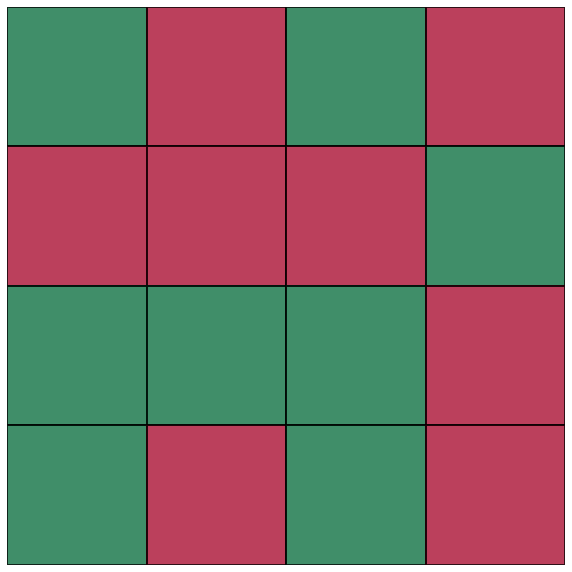

In [110]:
#Debugging
sim = Ising(4, 2)
sim.observe()
sim.select(0,1)
print(sim.avg_magnetization())
sim.update()

In [112]:
magentization_lists = [[] for i in range(6)]
for t in list(range(1, 6)):
    for i in range(100):
        sim = Ising(10, t)
        for step in range(100000):
            sim.update()
        magentization_lists[t].append(sim.avg_magnetization())

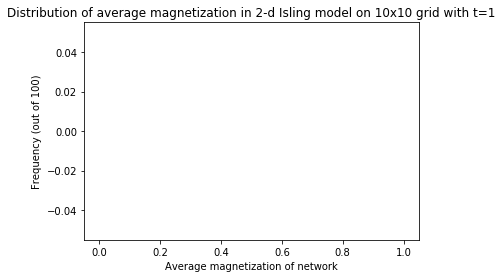

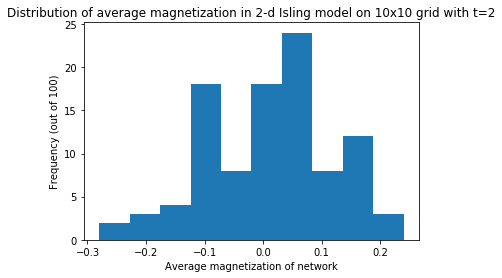

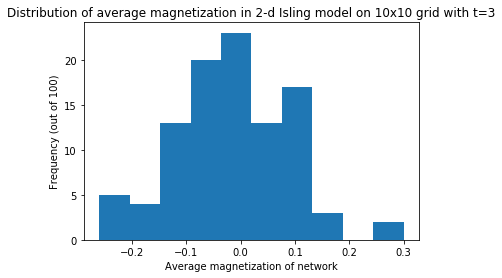

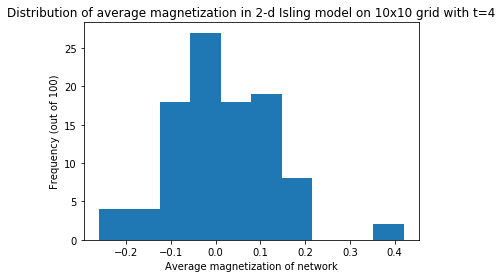

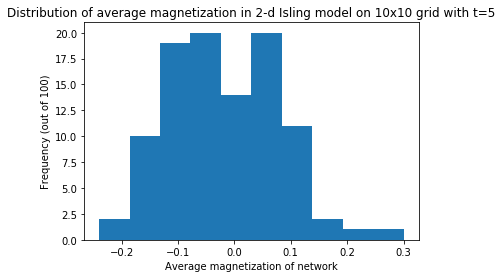

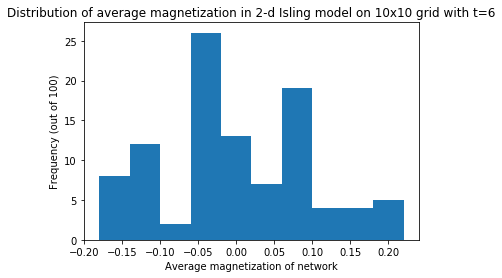

In [114]:
for i in range(6):
    plt.hist(magentization_lists[i])
    plt.title("Distribution of average magnetization in 2-d Isling model on 10x10 grid with t={}".format(i+1))
    plt.xlabel("Average magnetization of network")
    plt.ylabel("Frequency (out of 100)")
    plt.show()

There does not seem to be any strong patterns. The variance seems to be between -0.2 to 0.2 and -0.3 and 0.3 for all the values of t. Further, in each case, the distribution over average magnetization is centered at 0.